# Project: Wrangle and Analyze Data
## content
<ol>
<li><a href="#purpose of project">purpose of project</a></li>
<li><a href="#Gathering">Gathering</a></li>
<li><a href="#Assessing">Assessing</a></li>
<li><a href="#cleaning">Cleaning</a></li>
</ol>

## 1.purpose of project
We will be wrangling (and analyzing and visualizing) the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.

## 2.Gathering

#### Import packages

In [2]:
import pandas as pd
import numpy as np
import requests
import os

In [3]:
#Read CSV file 
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
#Read TSV file 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [6]:
df_images = pd.read_csv('image-predictions.tsv', sep='\t')
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [7]:
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
import tweepy 
from tweepy import OAuthHandler
import json 
from timeit import default_timer as timer

In [8]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [9]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [10]:
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

2356

In [ ]:
num_of_tweet = 0
fails_dict = {}
start = timer()
with open('tweet-json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        num_of_tweet += 1
        print(str(num_of_tweet) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Successs")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Successs
2: 892177421306343426
Successs
3: 891815181378084864
Successs
4: 891689557279858688
Successs
5: 891327558926688256
Successs
6: 891087950875897856
Successs
7: 890971913173991426
Successs
8: 890729181411237888
Successs
9: 890609185150312448
Successs
10: 890240255349198849
Successs
11: 890006608113172480
Successs
12: 889880896479866881
Successs
13: 889665388333682689
Successs
14: 889638837579907072
Successs
15: 889531135344209921
Successs
16: 889278841981685760
Successs
17: 888917238123831296
Successs
18: 888804989199671297
Successs
19: 888554962724278272
Successs
20: 888202515573088257
fail
21: 888078434458587136
Successs
22: 887705289381826560
Successs
23: 887517139158093824
Successs
24: 887473957103951883
Successs
25: 887343217045368832
Successs
26: 887101392804085760
Successs
27: 886983233522544640
Successs
28: 886736880519319552
Successs
29: 886680336477933568
Successs
30: 886366144734445568
Successs
31: 886267009285017600
Successs
32: 88625838415188787

Successs
256: 844223788422217728
Successs
257: 843981021012017153
Successs
258: 843856843873095681
Successs
259: 843604394117681152
Successs
260: 843235543001513987
Successs
261: 842892208864923648
fail
262: 842846295480000512
Successs
263: 842765311967449089
Successs
264: 842535590457499648
Successs
265: 842163532590374912
Successs
266: 842115215311396866
Successs
267: 841833993020538882
Successs
268: 841680585030541313
Successs
269: 841439858740625411
Successs
270: 841320156043304961
Successs
271: 841314665196081154
Successs
272: 841077006473256960
Successs
273: 840761248237133825
Successs
274: 840728873075638272
Successs
275: 840698636975636481
Successs
276: 840696689258311684
Successs
277: 840632337062862849
Successs
278: 840370681858686976
Successs
279: 840268004936019968
Successs
280: 839990271299457024
Successs
281: 839549326359670784
Successs
282: 839290600511926273
Successs
283: 839239871831150596
Successs
284: 838952994649550848
Successs
285: 838921590096166913
Successs
286: 

Successs
506: 812781120811126785
Successs
507: 812747805718642688
fail
508: 812709060537683968
Successs
509: 812503143955202048
Successs
510: 812466873996607488
Successs
511: 812372279581671427
Successs
512: 811985624773361665
Successs
513: 811744202451197953
Successs
514: 811647686436880384
Successs
515: 811627233043480576
Successs
516: 811386762094317568
Successs
517: 810984652412424192
Successs
518: 810896069567610880
Successs
519: 810657578271330305
Successs
520: 810284430598270976
Successs
521: 810254108431155201
Successs
522: 809920764300447744
Successs
523: 809808892968534016
Successs
524: 809448704142938112
Successs
525: 809220051211603969
Successs
526: 809084759137812480
Successs
527: 808838249661788160
Successs
528: 808733504066486276
Successs
529: 808501579447930884
Successs
530: 808344865868283904
Successs
531: 808134635716833280
Successs
532: 808106460588765185
Successs
533: 808001312164028416
Successs
534: 807621403335917568
Successs
535: 807106840509214720
Successs
536: 

Successs
755: 778764940568104960
Successs
756: 778748913645780993
Successs
757: 778650543019483137
Successs
758: 778624900596654080
Successs
759: 778408200802557953
Successs
760: 778396591732486144
Successs
761: 778383385161035776
Successs
762: 778286810187399168
Successs
763: 778039087836069888
Successs
764: 778027034220126208
Successs
765: 777953400541634568
Successs
766: 777885040357281792
Successs
767: 777684233540206592
Successs
768: 777641927919427584
Successs
769: 777621514455814149
Successs
770: 777189768882946048
Successs
771: 776819012571455488
Successs
772: 776813020089548800
Successs
773: 776477788987613185
Successs
774: 776249906839351296
Successs
775: 776218204058357768
Successs
776: 776201521193218049
Successs
777: 776113305656188928
Successs
778: 776088319444877312
Successs
779: 775898661951791106
Successs
780: 775842724423557120
Successs
781: 775733305207554048
Successs
782: 775729183532220416
Successs
783: 775364825476165632
Successs
784: 775350846108426240
Successs
7

In [9]:
df_list = []
with open('tweet-json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [10]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [11]:
tweet_data = pd.DataFrame(df_list, columns = {'id', 'retweet_count', 'favorite_count'})
tweet_data.head()

,favorite_count,id,retweet_count
0,35002,892420643555336193,7349
1,30312,892177421306343426,5480
2,22797,891815181378084864,3624
3,38267,891689557279858688,7535
4,36546,891327558926688256,8119


In [12]:
tweet_data = tweet_data.rename(columns = {'id': 'tweet_id'})
tweet_data.head()

,favorite_count,tweet_id,retweet_count
0,35002,892420643555336193,7349
1,30312,892177421306343426,5480
2,22797,891815181378084864,3624
3,38267,891689557279858688,7535
4,36546,891327558926688256,8119


In [13]:
tweet_data.to_csv('tweet_data.csv', index='false')


In [14]:
tweet_Api =pd.read_csv('tweet_data.csv')

In [15]:
tweet_Api.head()

,Unnamed: 0,favorite_count,tweet_id,retweet_count
0,0,35002,892420643555336193,7349
1,1,30312,892177421306343426,5480
2,2,22797,891815181378084864,3624
3,3,38267,891689557279858688,7535
4,4,36546,891327558926688256,8119


## 3.Assessing

## Twitter Archive data


In [16]:
df_archive.shape

(2356, 17)

In [17]:
df_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [18]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
retweet_count= sum(~df_archive['retweeted_status_id'].isnull())
print('number of retweets = ',retweet_count)

number of retweets =  181


In [20]:
df_archive.rating_numerator.describe()


count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [21]:
df_archive.rating_numerator.value_counts()


12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
numerator = [420,165,144,182,143,666,960,1776]
for n in numerator:
    print(df_archive.loc[df_archive['rating_numerator'] == n , 'text'],'\n')

188     @dhmontgomery We also gave snoop dogg a 420/10...
2074    After so many requests... here you go.\n\nGood...
Name: text, dtype: object 

902    Why does this never happen at my front door......
Name: text, dtype: object 

1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object 

290    @markhoppus 182/10
Name: text, dtype: object 

1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object 

189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object 

313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object 

979    This is Atticus. He's quite simply America af....
Name: text, dtype: object 



In [23]:
df_archive.rating_denominator.value_counts()


10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
demo = [11,50,80,20,2,16,40,70,15,90,110,120,130,150,170,7,0]
for n in demo:
    print(df_archive.loc[df_archive['rating_denominator'] == n , 'text'],'\n')

784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object 

1202    This is Bluebert. He just saw that both #Final...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
Name: text, dtype: object 

1254    Here's a brigade of puppers. All look very pre...
1843    Here we have an entire platoon of puppers. Tot...
Name: text, dtype: object 

1165    Happy 4/20 from the squad! 13/10 for all https...
1598    Yes I do realize a rating of 4/20 would've bee...
Name: text, dtype: object 

2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object 

1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object 

1433    Happy Wednesday here's a bucket of pups. 44/40...
Name: text, dtype: object 

433    The floofs have been released I repeat the 

In [25]:
df_archive['text'][516] #demo = 0


'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [26]:
df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2129,670290420111441920,NaN,NaN,2015-11-27 17:17:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sandra. She's going skydiving. Nice ad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670290420...,11,10,Sandra,None,None,None,None
17,888804989199671297,NaN,NaN,2017-07-22 16:56:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeke. He has a new stick. Very proud o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888804989...,13,10,Zeke,None,None,None,None
164,860184849394610176,NaN,NaN,2017-05-04 17:30:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have perhaps the wisest dog of all. Ab...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/860184849...,14,10,None,None,None,None,None
1287,708356463048204288,NaN,NaN,2016-03-11 18:18:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. That is his castle. He protect...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708356463...,10,10,Oliver,None,None,None,None
282,839239871831150596,NaN,NaN,2017-03-07 22:22:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Odie. He's big. 13/10 would attempt to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/839239871...,13,10,Odie,None,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085...,9,10,a,None,None,None,None
713,784183165795655680,NaN,NaN,2016-10-07 00:06:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Reginald. He's one magical puppo. Aero...,NaN,NaN,NaN,https://vine.co/v/5ghHLBMMdlV,12,10,Reginald,None,None,None,puppo
1654,683449695444799489,NaN,NaN,2016-01-03 00:47:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I just want to be friends with this dog. Appea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683449695...,10,10,None,None,None,None,None
468,817056546584727552,NaN,NaN,2017-01-05 17:13:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chloe. She fell asleep at the wheel. A...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817056546...,11,10,Chloe,None,None,None,None
1945,673707060090052608,NaN,NaN,2015-12-07 03:34:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Raymond. He's absolutely terrified of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673707060...,10,10,Raymond,None,None,pupper,None


In [27]:
df_images.info

<bound method DataFrame.info of                 tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    66607119322150

In [28]:
df_images.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1418,771380798096281600,https://pbs.twimg.com/media/CrR-vVfXEAAk6Gg.jpg,1,collie,0.503728,True,Border_collie,0.450944,True,English_springer,0.012693,True
482,675372240448454658,https://pbs.twimg.com/media/CV9nd30XAAAEba5.jpg,1,Chihuahua,0.416385,True,West_Highland_white_terrier,0.102933,True,Samoyed,0.087300,True
1351,759846353224826880,https://pbs.twimg.com/media/CouEOZhWAAAgFpE.jpg,1,Sussex_spaniel,0.355395,True,vizsla,0.141094,True,otterhound,0.092198,True
1924,857263160327368704,https://pbs.twimg.com/media/C-WcS4MXoAADrBU.jpg,1,Samoyed,0.998021,True,Pomeranian,0.000922,True,keeshond,0.000311,True
1112,724049859469295616,https://pbs.twimg.com/media/CgxXf1TWYAEjY61.jpg,1,Border_collie,0.581835,True,collie,0.344588,True,Shetland_sheepdog,0.043584,True
1890,848690551926992896,https://pbs.twimg.com/media/C8cnjHuXsAAoZQf.jpg,1,flat-coated_retriever,0.823648,True,Newfoundland,0.100571,True,groenendael,0.038310,True
2040,885167619883638784,https://pbs.twimg.com/media/DEi_N9qXYAAgEEw.jpg,4,malamute,0.812482,True,Siberian_husky,0.071712,True,Eskimo_dog,0.055770,True
276,670840546554966016,https://pbs.twimg.com/media/CU9N6upXAAAbtQe.jpg,1,Shih-Tzu,0.963622,True,Lhasa,0.016017,True,guinea_pig,0.007932,False
672,683142553609318400,https://pbs.twimg.com/media/CXsChyjW8AQJ16C.jpg,1,Leonberg,0.605851,True,chow,0.183470,True,German_shepherd,0.079662,True
1020,710153181850935296,https://pbs.twimg.com/media/Cdr4jO2UAAAIo6W.jpg,2,cowboy_hat,0.979053,False,sombrero,0.010682,False,cocker_spaniel,0.002713,True


In [29]:
df_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
tweet_Api.head()

,Unnamed: 0,favorite_count,tweet_id,retweet_count
0,0,35002,892420643555336193,7349
1,1,30312,892177421306343426,5480
2,2,22797,891815181378084864,3624
3,3,38267,891689557279858688,7535
4,4,36546,891327558926688256,8119


In [31]:
tweet_Api.sample(5)

,Unnamed: 0,favorite_count,tweet_id,retweet_count
1441,1441,1961,694352839993344000,582
1929,1929,676,673656262056419329,217
1363,1363,2201,700505138482569216,547
1573,1573,2141,686050296934563840,698
2137,2137,331,669393256313184256,66


In [32]:
tweet_Api.head()

,Unnamed: 0,favorite_count,tweet_id,retweet_count
0,0,35002,892420643555336193,7349
1,1,30312,892177421306343426,5480
2,2,22797,891815181378084864,3624
3,3,38267,891689557279858688,7535
4,4,36546,891327558926688256,8119


In [33]:
tweet_Api.info

<bound method DataFrame.info of       Unnamed: 0  favorite_count            tweet_id  retweet_count
0              0           35002  892420643555336193           7349
1              1           30312  892177421306343426           5480
2              2           22797  891815181378084864           3624
3              3           38267  891689557279858688           7535
4              4           36546  891327558926688256           8119
5              5           18434  891087950875897856           2715
6              6           10724  890971913173991426           1758
7              7           58951  890729181411237888          16476
8              8           25365  890609185150312448           3769
9              9           28949  890240255349198849           6381
10            10           27914  890006608113172480           6408
11            11           25372  889880896479866881           4346
12            12           43582  889665388333682689           8736
13            13

In [34]:
tweet_Api.sample(10)


,Unnamed: 0,favorite_count,tweet_id,retweet_count
2261,2261,13114,667182792070062081,5557
978,978,2831,747885874273214464,929
1478,1478,3268,692041934689402880,1205
1783,1783,2132,676897532954456065,686
1386,1386,2511,699036661657767936,1152
16,16,26479,888917238123831296,3910
1769,1769,3464,677328882937298944,1422
1368,1368,2538,700062718104104960,652
896,896,10103,756526248105566208,3458
2243,2243,344,667517642048163840,176


In [35]:
tweet_Api['favorite_count'].duplicated().sum()

325

# Quality

1- Many rows in the twitter enhanced dataset did not mention the stage of dog that is all the four stages in many rows are None.
2- There are 1976 rows with no definition of the dog's stage.
3- DataType of columns in the twitter enhanced dataset such as 'timestamp','retweeted_status_timestamp' are defined as String whereas it should be datetime.
4- There are missing expanded urls in the twitter enhanced dataset.
5- There are 181 retweeted_status_id which means that our dataset contains retweets as well.
6- We do not need retweets in out dataset for analysis so we need to remove retweet_user_id and other columns related to retweets.
7- Some of the names are 'a', 'an', 'the' which are not invalid.
8- Source names need to be redefined without tags.
9- The common numerator ratings given by @weratedogs are 11,12,13,16 so on. But,here we find that most of the ratings are too high such as 1776,960,666 etc.
10- We know that @WeRateDogs keep their denominator as 10 always while rating dogs but here some of the ratings are 11,50,2,7,0,110 etc.
11- After assessing the image prediction dataset visually, we find that for the last row, all the predictions of dog breed are false, which means, some images are not dogs.
12- Some of the names of dog breed are not defined, like 'bookshop','bakery','book_jacket', 'orange'.
13- The Image Urls are same for some images.
14- The names of dog in Image prediction Dataset are separated by underscore instead of space.


### Tidiness
1- df_Twitter_Archive : merge the four columns (dogoo,floofer,pupper,puppo).

2- Merge the three DataFrame in one dataset.

## 4.cleaning

In [36]:
# take a copy from the orignal data 
df_Twitter_Archive_clean = df_archive.copy()
image_prediction_clean = df_images.copy()
Api_df_clean = tweet_Api.copy()

### 1-Define
drop rows that are retweets and replays using is.null

### Code

In [37]:
df_Twitter_Archive_clean = df_Twitter_Archive_clean[df_Twitter_Archive_clean.retweeted_status_id.isnull()]
df_Twitter_Archive_clean = df_Twitter_Archive_clean[df_Twitter_Archive_clean.in_reply_to_user_id.isnull()]

### Test

In [38]:
df_Twitter_Archive_clean.shape

(2097, 17)

### 2-Define
Select the columns related to retweets and drop them as it is of no use further.

### Code

In [39]:
df_Twitter_Archive_clean.drop(["retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp","in_reply_to_status_id","in_reply_to_user_id"], axis=1, inplace=True)

### Test

In [40]:
df_Twitter_Archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


###  3-Define
Select the column 'timestamp' and change the DataType of timestamp from string to datetime.


### Code

In [41]:
df_Twitter_Archive_clean['timestamp'] = pd.to_datetime(df_Twitter_Archive_clean['timestamp'])

### Test

In [42]:
df_Twitter_Archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


###  4-Define
Select rows with missing values of expand urls and remove them. 


### Code

In [43]:
df_Twitter_Archive_clean.dropna(subset=['expanded_urls'],inplace=True)

### Test

In [44]:
df_Twitter_Archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 212.7+ KB


###  5-Define
convert 'none' in (name) column to NAN in  df_archive DataFrame.

### Code

In [45]:
df_Twitter_Archive_clean.name.replace(to_replace = 'None',value=np.nan, inplace=True)

### Test

In [46]:
df_Twitter_Archive_clean.name.value_counts()

a           55
Charlie     11
Lucy        11
Cooper      10
Oliver      10
Tucker       9
Penny        9
Sadie        8
Lola         8
Winston      8
the          8
Toby         7
Daisy        7
Oscar        6
Bella        6
Stanley      6
an           6
Jax          6
Koda         6
Bo           6
Bailey       6
Leo          5
Chester      5
Louis        5
Milo         5
Rusty        5
Bentley      5
Scout        5
Buddy        5
Dave         5
            ..
Kayla        1
Bobb         1
Stark        1
Emmy         1
Levi         1
Tito         1
Grizzie      1
Willow       1
Gustaf       1
Monster      1
Carter       1
Bones        1
Liam         1
Ralphie      1
Ace          1
Donny        1
Jay          1
Skittles     1
Edmund       1
Jiminus      1
Eleanor      1
Rufio        1
Freddery     1
Tedders      1
Darby        1
Tug          1
Dido         1
Meera        1
Tycho        1
Dale         1
Name: name, Length: 954, dtype: int64

### 6 -Define
Set the numerator rating in terms of denominator as most of the times denominator is 10 and then remove the denominator column with ratings not equal to 10.

### Code

In [47]:
df_Twitter_Archive_clean.rating_numerator=(df_Twitter_Archive_clean.rating_numerator/df_Twitter_Archive_clean.rating_denominator)*10

### Test

In [48]:
df_Twitter_Archive_clean[df_Twitter_Archive_clean['rating_denominator']!=10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,12.000000,70,NaN,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",34.285714,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,11.000000,150,NaN,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,8.181818,11,NaN,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,12.000000,170,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,2.000000,20,NaN,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,10.000000,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,11.000000,90,NaN,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,10.000000,80,NaN,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,9.000000,50,NaN,None,None,None,None


###  7-Define
Select the source column and extract the text between anchor tags.

### Code

In [49]:
import re

df_Twitter_Archive_clean['source'] = df_Twitter_Archive_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

### Test

In [50]:
df_Twitter_Archive_clean['source'].value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

## Image Prediction

In [51]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


###  8-Define
Select the columns for which dog breed classifier is true and remove the images which are not dogs.

### Code

In [52]:
image_prediction_clean= image_prediction_clean.query('p1_dog==True and p2_dog==True and p3_dog==True')

### Test

In [53]:
image_prediction_clean.query('p1_dog==False and p2_dog==False and p3_dog==False').shape[0]

0

###  9-Define
Select the dog breed prediction columns that is p1, p2 and p3 and then replace underscore in dog breed's name with space.

### Code

In [54]:
image_prediction_clean['p1']=image_prediction_clean['p1'].replace('_', ' ', regex=True)
image_prediction_clean['p2']=image_prediction_clean['p2'].replace('_', ' ', regex=True)
image_prediction_clean['p3']=image_prediction_clean['p3'].replace('_', ' ', regex=True)

### Test

In [55]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Twitter API Dataset

In [56]:
Api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
Unnamed: 0        2331 non-null int64
favorite_count    2331 non-null int64
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(4)
memory usage: 72.9 KB


### Tidiness

#### 1- Define:
merge the last 4 culomns (doggo, floofer, pupper and puppo) to one titled as dog type, and create new categories to fill multiple types.


In [71]:
# handle none
df_Twitter_Archive_clean.doggo.replace('None', '', inplace=True)
df_Twitter_Archive_clean.floofer.replace('None', '', inplace=True)
df_Twitter_Archive_clean.pupper.replace('None', '', inplace=True)
df_Twitter_Archive_clean.puppo.replace('None', '', inplace=True)

# merge into column
df_Twitter_Archive_clean['dog_type'] = df_Twitter_Archive_clean.doggo + df_Twitter_Archive_clean.floofer + df_Twitter_Archive_clean.pupper + df_Twitter_Archive_clean.puppo

# handle multiple stages
df_Twitter_Archive_clean.loc[df_Twitter_Archive_clean.dog_type == 'doggopupper', 'dog_type'] = 'doggo, pupper'
df_Twitter_Archive_clean.loc[df_Twitter_Archive_clean.dog_type == 'doggopuppo', 'dog_type'] = 'doggo, puppo'
df_Twitter_Archive_clean.loc[df_Twitter_Archive_clean.dog_type == 'doggofloofer', 'dog_type'] = 'doggo, floofer'

# handle missing values
df_Twitter_Archive_clean.loc[df_Twitter_Archive_clean.dog_type == '', 'dog_type'] = np.nan

In [72]:
df_Twitter_Archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 27 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null float64
rating_denominator    2094 non-null int64
name                  1494 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dog_type              335 non-null object
jpg_url               1194 non-null object
img_num               1194 non-null float64
p1                    1194 non-null object
p1_conf               1194 non-null float64
p1_dog                1194 non-null object
p2                    1194 non-null object
p2_conf               1194 non-null float64
p2_dog                11

In [73]:
df_Twitter_Archive_clean.dog_type.value_counts()

pupper            220
doggo              72
puppo              23
doggo, pupper       9
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_type, dtype: int64

In [70]:
df_Twitter_Archive_clean.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Unnamed: 0,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,35002.0,7349.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,,,...,True,Pekinese,0.090647,True,papillon,0.068957,True,1.0,30312.0,5480.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,,,...,True,malamute,0.078253,True,kelpie,0.031379,True,2.0,22797.0,3624.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,38267.0,7535.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,,,...,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,4.0,36546.0,8119.0
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,NaN,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,18434.0,2715.0
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,10724.0,1758.0
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,NaN,,,...,True,Eskimo dog,0.178406,True,Pembroke,0.076507,True,7.0,58951.0,16476.0
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,,,...,True,Irish setter,0.193054,True,Chesapeake Bay retriever,0.118184,True,8.0,25365.0,3769.0
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,9.0,28949.0,6381.0


In [82]:
df_Twitter_Archive_clean.columns


Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_type', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'Unnamed: 0', 'favorite_count', 'retweet_count'],
      dtype='object')

In [81]:
df_Twitter_Archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)


KeyError: "['doggo' 'floofer' 'pupper' 'puppo'] not found in axis"

In [76]:
df_Twitter_Archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Unnamed: 0,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,35002.0,7349.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,1.0,30312.0,5480.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,2.0,22797.0,3624.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,38267.0,7535.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,4.0,36546.0,8119.0


In [77]:
df_Twitter_Archive_clean.columns


Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_type', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'Unnamed: 0', 'favorite_count', 'retweet_count'],
      dtype='object')

In [96]:
df_Twitter_Archive_clean.drop(['rating_denominator', 'rating_numerator'], axis=1, inplace=True)


In [97]:
df_Twitter_Archive_clean.columns


Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'dog_type', 'jpg_url_x', 'img_num_x', 'p1_x', 'p1_conf_x', 'p1_dog_x',
       'p2_x', 'p2_conf_x', 'p2_dog_x', 'p3_x', 'p3_conf_x', 'p3_dog_x',
       'Unnamed: 0_x', 'favorite_count_x', 'retweet_count_x', 'jpg_url_y',
       'img_num_y', 'p1_y', 'p1_conf_y', 'p1_dog_y', 'p2_y', 'p2_conf_y',
       'p2_dog_y', 'p3_y', 'p3_conf_y', 'p3_dog_y', 'Unnamed: 0_y',
       'favorite_count_y', 'retweet_count_y', 'rating'],
      dtype='object')

In [99]:
df_Twitter_Archive_clean.info


<bound method DataFrame.info of                 tweet_id           timestamp              source  \
0     892420643555336193 2017-08-01 16:23:56  Twitter for iPhone   
1     892177421306343426 2017-08-01 00:17:27  Twitter for iPhone   
2     891815181378084864 2017-07-31 00:18:03  Twitter for iPhone   
3     891689557279858688 2017-07-30 15:58:51  Twitter for iPhone   
4     891327558926688256 2017-07-29 16:00:24  Twitter for iPhone   
5     891087950875897856 2017-07-29 00:08:17  Twitter for iPhone   
6     890971913173991426 2017-07-28 16:27:12  Twitter for iPhone   
7     890729181411237888 2017-07-28 00:22:40  Twitter for iPhone   
8     890609185150312448 2017-07-27 16:25:51  Twitter for iPhone   
9     890240255349198849 2017-07-26 15:59:51  Twitter for iPhone   
10    890006608113172480 2017-07-26 00:31:25  Twitter for iPhone   
11    889880896479866881 2017-07-25 16:11:53  Twitter for iPhone   
12    889665388333682689 2017-07-25 01:55:32  Twitter for iPhone   
13    8896388375

###  2-Define
Merge numerator and denominator in one table named rating

### Code

In [93]:
df_Twitter_Archive_clean['rating'] = df_Twitter_Archive_clean['rating_numerator'].astype(str) + "/" + df_Twitter_Archive_clean['rating_denominator'].astype(str)

### Test

In [94]:
df_Twitter_Archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url_x,...,p2_y,p2_conf_y,p2_dog_y,p3_y,p3_conf_y,p3_dog_y,Unnamed: 0_y,favorite_count_y,retweet_count_y,rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,35002.0,7349.0,13.0/10
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,Pekinese,0.090647,True,papillon,0.068957,True,1.0,30312.0,5480.0,13.0/10
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,malamute,0.078253,True,kelpie,0.031379,True,2.0,22797.0,3624.0,12.0/10
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,38267.0,7535.0,13.0/10
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,English springer,0.225770,True,German short-haired pointer,0.175219,True,4.0,36546.0,8119.0,12.0/10


In [95]:
df_Twitter_Archive_clean.columns


Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_type',
       'jpg_url_x', 'img_num_x', 'p1_x', 'p1_conf_x', 'p1_dog_x', 'p2_x',
       'p2_conf_x', 'p2_dog_x', 'p3_x', 'p3_conf_x', 'p3_dog_x',
       'Unnamed: 0_x', 'favorite_count_x', 'retweet_count_x', 'jpg_url_y',
       'img_num_y', 'p1_y', 'p1_conf_y', 'p1_dog_y', 'p2_y', 'p2_conf_y',
       'p2_dog_y', 'p3_y', 'p3_conf_y', 'p3_dog_y', 'Unnamed: 0_y',
       'favorite_count_y', 'retweet_count_y', 'rating'],
      dtype='object')

###  3-Define
 Merge two datasets first and then merge the third dataset in the master dataset.

### Code

In [100]:
df_Twitter_Archive_clean = pd.merge(df_Twitter_Archive_clean, image_prediction_clean, on = ['tweet_id'], how = 'left')

In [101]:
Api_df_clean.head()

,Unnamed: 0,favorite_count,tweet_id,retweet_count
0,0,35002,892420643555336193,7349
1,1,30312,892177421306343426,5480
2,2,22797,891815181378084864,3624
3,3,38267,891689557279858688,7535
4,4,36546,891327558926688256,8119


In [104]:
df_Twitter_Archive_clean = pd.merge(df_Twitter_Archive_clean, Api_df_clean, on = ['tweet_id'], how = 'left')

In [105]:
df_Twitter_Archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,dog_type,jpg_url_x,img_num_x,p1_x,...,p2_dog,p3,p3_conf,p3_dog,Unnamed: 0_x,favorite_count_x,retweet_count_x,Unnamed: 0_y,favorite_count_y,retweet_count_y
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,35002.0,7349.0,0.0,35002.0,7349.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,...,True,papillon,0.068957,True,1.0,30312.0,5480.0,1.0,30312.0,5480.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,...,True,kelpie,0.031379,True,2.0,22797.0,3624.0,2.0,22797.0,3624.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,38267.0,7535.0,3.0,38267.0,7535.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,...,True,German short-haired pointer,0.175219,True,4.0,36546.0,8119.0,4.0,36546.0,8119.0


## Storing

In [88]:
df_Twitter_Archive_clean.to_csv('twitter_archive_master.csv', index=False) 

In [89]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url_x,...,p1_dog_y,p2_y,p2_conf_y,p2_dog_y,p3_y,p3_conf_y,p3_dog_y,Unnamed: 0_y,favorite_count_y,retweet_count_y
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,35002.0,7349.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,1.0,30312.0,5480.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,2.0,22797.0,3624.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,38267.0,7535.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,4.0,36546.0,8119.0


In [113]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'dog_type', 'jpg_url_x', 'img_num_x', 'p1_x', 'p1_conf_x', 'p1_dog_x',
       'p2_x', 'p2_conf_x', 'p2_dog_x', 'p3_x', 'p3_conf_x', 'p3_dog_x',
       'Unnamed: 0_x', 'favorite_count_x', 'retweet_count_x', 'jpg_url_y',
       'img_num_y', 'p1_y', 'p1_conf_y', 'p1_dog_y', 'p2_y', 'p2_conf_y',
       'p2_dog_y', 'p3_y', 'p3_conf_y', 'p3_dog_y', 'Unnamed: 0_y',
       'favorite_count_y', 'retweet_count_y', 'rating', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'Unnamed: 0_x.1', 'favorite_count_x.1', 'retweet_count_x.1',
       'Unnamed: 0_y.1', 'favorite_count_y.1', 'retweet_count_y.1',
       'Unnamed: 0', 'favorite_count', 'retweet_count'],
      dtype='object')

### Test

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 37 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null float64
rating_denominator    2094 non-null int64
name                  1494 non-null object
dog_type              335 non-null object
jpg_url_x             1194 non-null object
img_num_x             1194 non-null float64
p1_x                  1194 non-null object
p1_conf_x             1194 non-null float64
p1_dog_x              1194 non-null object
p2_x                  1194 non-null object
p2_conf_x             1194 non-null float64
p2_dog_x              1194 non-null object
p3_x                  1194 non-null object
p3_conf_x             1194 non-null float64
p3_dog_x              1194 non-null object
Unnamed: 0_x          2087 non-

# Analyzing & Visualizing Data

## Question 1:
Is retweet_count related to favorite_count that is whether the post will have more retweets if that tweet is favorite?

In [114]:
import seaborn as sns

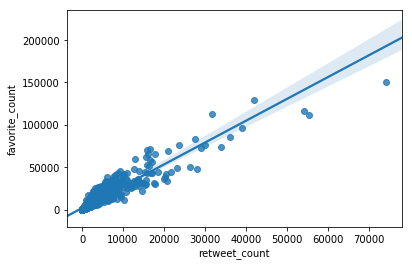

In [115]:
sns.regplot(data=df,x='retweet_count',y='favorite_count');

By the scatterplot above, we see that retweet count and favorite count are strongly related to each other with a positive correlation.

## Question 2 

- Which is the most common Dog Stage?

In [118]:
df['dog_type'].value_counts()

pupper            220
doggo              72
puppo              23
doggo, pupper       9
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_type, dtype: int64

Text(0.5,1,'Most common Stage of Dog')

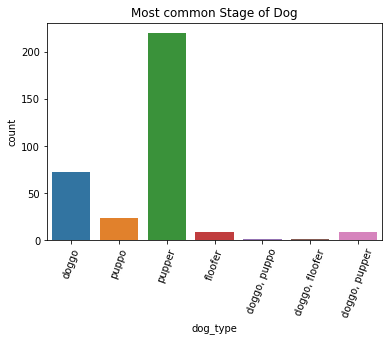

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(data=df,x='dog_type')
plt.xticks(rotation=70);
plt.title('Most common Stage of Dog')

Pupper is the most common dog stage among all the dogs.

## Question 3 
- Which is the most common breed of Dog predicted?

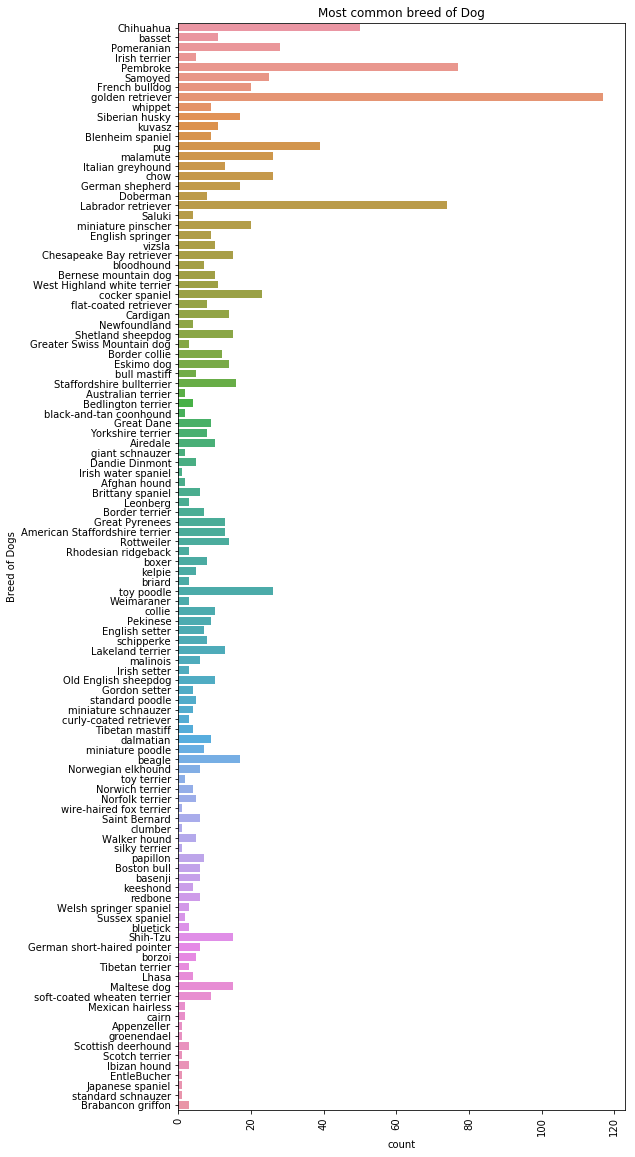

In [122]:
fig_dims = (8, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y = "p1", ax=ax, data=df)
plt.xticks(rotation=90);
plt.title('Most common breed of Dog')
plt.ylabel('Breed of Dogs');

Golden retriever, Labrador retriever, Pembroke, Chihuahua, Pug are the most common breeds of Dog.

## Question 4 
- Which is the top 10 breed of Dog which receives more retweets?

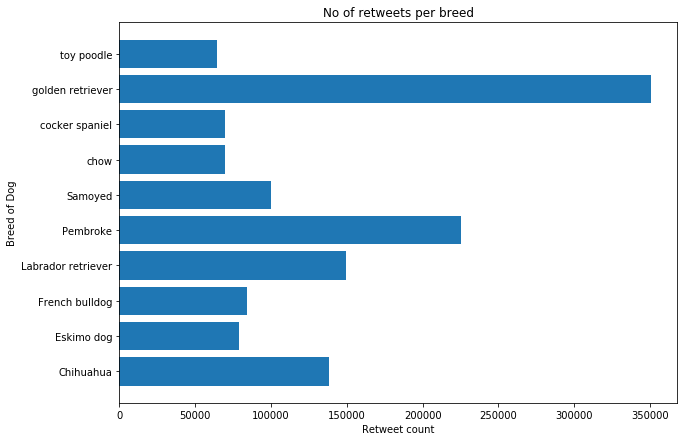

In [124]:
df_favorite = df.groupby('p1')['retweet_count'].sum().reset_index()
df_sorted = df_favorite.sort_values('retweet_count', ascending=False).head(10)
ser_ret = df_sorted['retweet_count']
ret_breed = df_sorted['p1']

fig, ax = plt.subplots(figsize=(10,7))
fav = plt.barh(ret_breed, ser_ret)

plt.ylabel('Breed of Dog')
plt.xlabel('Retweet count')
plt.title('No of retweets per breed');


The breed golden Retriever receives the more number of retweets.